In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/papushmido/Downloads/Instacart Basket Analysis_RD'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

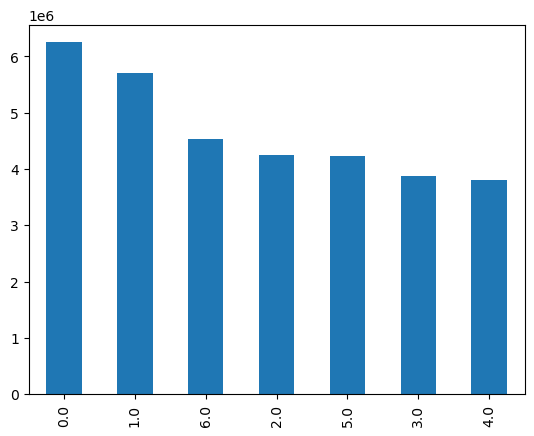

In [4]:
# create a bar chart for "orders_day_of_week"
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

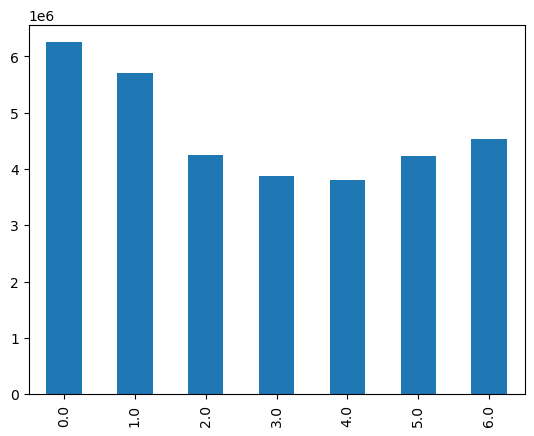

In [5]:
# add the sort_index() function to sort the bars in the chart according to their 
# index order instead of from largest to smallest.
bar_1 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# you can achieve the same outcome by printing frequencies. 
ords_prods_merge['orders_day_of_week'].value_counts()

0.0    6253163
1.0    5696950
6.0    4530449
2.0    4243329
5.0    4237104
3.0    3868914
4.0    3812541
Name: orders_day_of_week, dtype: int64

The above is the frequency from largest to smallest.

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0.0    6253163
1.0    5696950
2.0    4243329
3.0    3868914
4.0    3812541
5.0    4237104
6.0    4530449
Name: orders_day_of_week, dtype: int64

The above is the frequency according to the index order. 

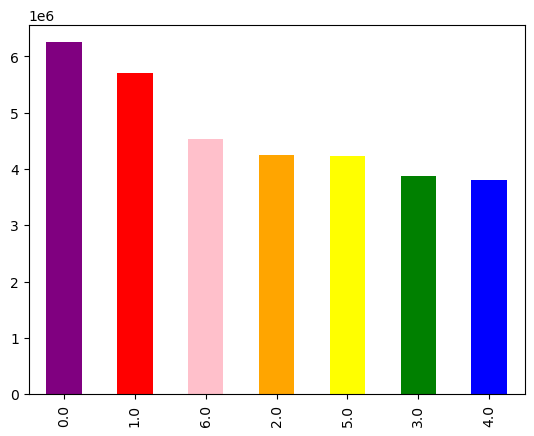

In [8]:
# assign colours to each bar so they are more distinct. you must list the colours in the order you want them to appear.
bar_2 = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# export your bar chart so you can access it outside of the notebook.
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms & scatterplots

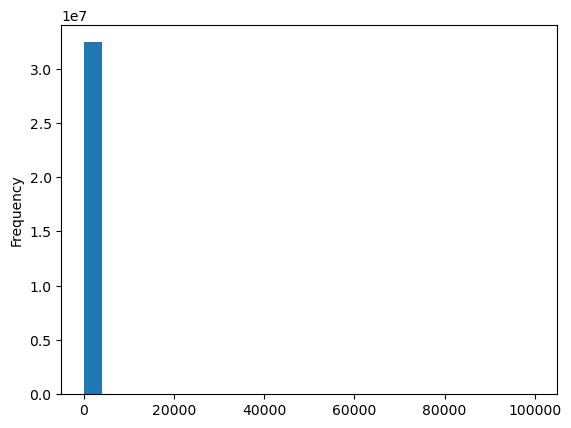

In [10]:
# create a histogram of the "prices" column.
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

There is a problem here as the code clearly states for a return of 25 bars not one. 

In [11]:
# investigate the statistics of the prices column
ords_prods_merge['prices'].describe()

count    3.243422e+07
mean     1.198114e+01
std      4.954310e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

The maximum value seems much too high so we are going to investigate further. 

In [12]:
# check the mean, median & max of the column. 
ords_prods_merge['prices'].mean()

11.981142683763423

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? 
This could be an outlier or the number is simply due to data corruption. 

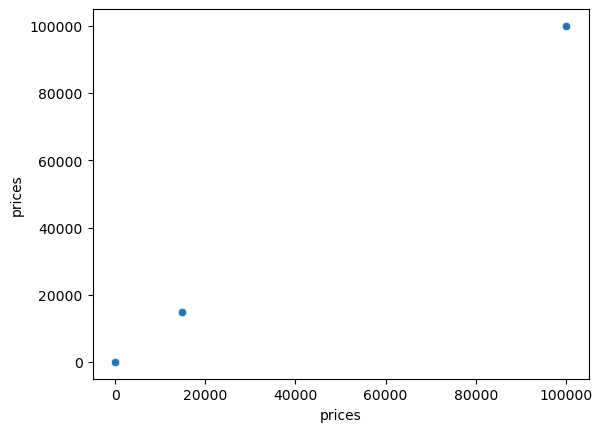

In [15]:
# create a scatterplot to investigate data spread & density. 
scat = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

In [16]:
# check if there are any values above a certain value within your data .eg. anything abover the 'normal' price.
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,reordered,_merge,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,Order frequency
13128382,21553.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,912404.0,17.0,12.0,2.0,14.0,...,0.0,both,Regularly busy,Most orders,41.0,Loyal customer,108.648299,High spender,5.0,Frequent customer
13128383,21553.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,603376.0,17.0,22.0,6.0,16.0,...,1.0,both,Regularly busy,Most orders,41.0,Loyal customer,108.648299,High spender,5.0,Frequent customer
13128384,21553.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,3264360.0,135.0,2.0,2.0,21.0,...,0.0,both,Regularly busy,Average orders,5.0,New customer,1154.792308,High spender,12.0,Regular customer
13128385,21553.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,892534.0,135.0,3.0,0.0,8.0,...,1.0,both,Busiest days,Least orders,5.0,New customer,1154.792308,High spender,12.0,Regular customer
13128386,21553.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,229704.0,342.0,8.0,1.0,19.0,...,0.0,both,Busiest days,Average orders,17.0,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815127,33664.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,2249946.0,204099.0,29.0,0.0,8.0,...,0.0,both,Busiest days,Least orders,40.0,Regular customer,1106.743956,High spender,4.0,Frequent customer
21815128,33664.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,2363282.0,204099.0,31.0,0.0,9.0,...,1.0,both,Busiest days,Most orders,40.0,Regular customer,1106.743956,High spender,4.0,Frequent customer
21815129,33664.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,3181945.0,204395.0,13.0,3.0,15.0,...,0.0,both,Least busy,Most orders,16.0,Regular customer,451.153540,High spender,5.0,Frequent customer
21815130,33664.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,2486215.0,205227.0,7.0,3.0,20.0,...,0.0,both,Least busy,Average orders,13.0,Regular customer,1178.381871,High spender,8.0,Frequent customer


From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $ 100). 
the 14900 is also an outlier/odd value skewing the results

In [17]:
# Make the odd values Nan's to assign missing values to the outliers. 
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

The command looks for values above 100 within the “prices” column and assigns them a value

In [18]:
# check if the replacement was successful by checking the max value. 
ords_prods_merge['prices'].max()

25.0

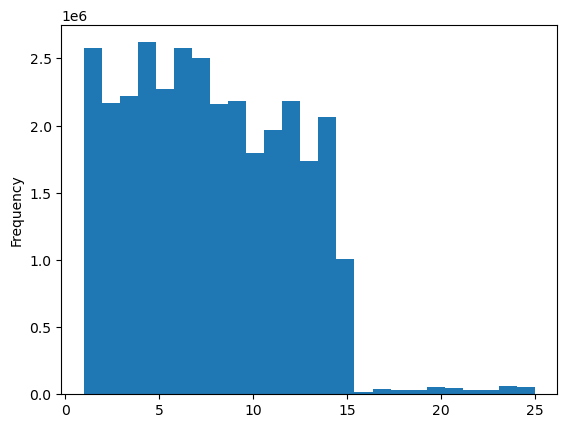

In [19]:
# retry the histogram to see the 'prices' column.
hist_1 = ords_prods_merge['prices'].plot.hist(bins = 25)

# Line charts & sampling data

A sample has to be representative of the whole population. SO whatever percentage of data you decide to use MUST be representative of the whole population. 

In [20]:
# 70/30 split - 30% of the data will represent 70% of the population. 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

dev will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7
np.random.rand() will create your list of random floating numbers between 0 and 1. 

len() produces a value that represents the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32,404,859, which is how many rows are in your dataframe.

In [21]:
dev

array([False,  True, False, ..., False,  True,  True])

Each piece of the split code, you need to:

1. Set the seed for the random number generator.

2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).


#### split dataframe into 2 separate samples. 

In [22]:
# Store 70% of the data in the dataframe 'big' 
big = ords_prods_merge[dev]

In [23]:
# Store 30% of the data in the dataframe 'small'
small = ords_prods_merge[~dev]

IMPORTANT!!! 
Check the results of the sample subsets to ensure you've achieved the results. 
if big is 70 percent of ords_prds_merge and small is 30 percent of ords_prods_merge then, theoretically, if you added the rows of both samples together, you’d get the same numbers of rows as your original ords_prods_merge dataframe.

In [24]:
len(ords_prods_merge)

32642461

In [25]:
# Add the 2 subsets together. 
len(big) + len(small)

32642461

#### Reduce sample subsets to include only those columns that you need. 

In [26]:
df_2 = small[['orders_day_of_week','prices']]

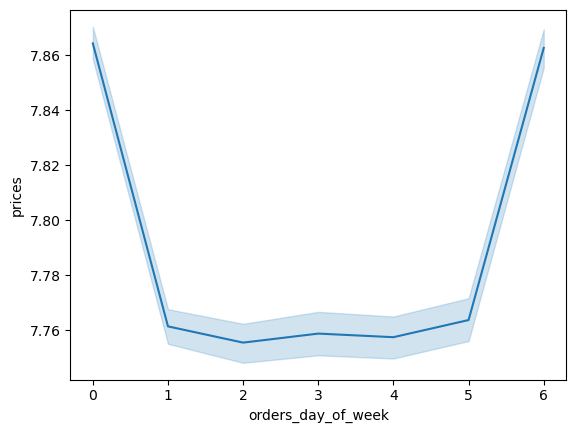

In [27]:
# Create line chart.
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Assignment Part II

In [28]:
# import updated dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [29]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'Busiest days', 'Busiest_period_of_day',
       'max_order', 'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'Order frequency', 'First Name',
       'Last_name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

### step 3: create histogram of the "order time of day" column

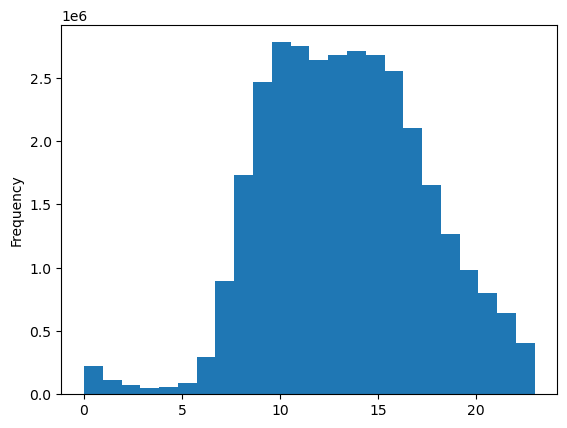

In [30]:
# create a histogram 
hist_2 = df['order_time_of_day'].plot.hist(bins = 24)

The histogram shows the times customers normally buy from instacart. 
As follows the busiest times of the day are between 1000 and 1600.

### Step 4 : marketing team wants to know distribution of orders by loyalty. 

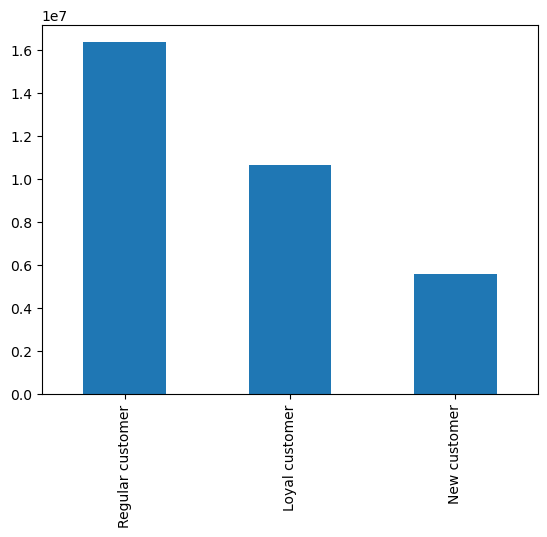

In [31]:
# create a bar chart from the "loyalty column"
hist_3 = df['loyalty_flag'].value_counts().plot.bar()

Ans: This Histogram demonstrates that on average, the regular customer buys the most items comparatively, and that the new customer buys the least number of items. 

### Step 5: Check the relationship between the expenditure and the time of day. 

In [32]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'Busiest days', 'Busiest_period_of_day',
       'max_order', 'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'Order frequency', 'First Name',
       'Last_name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

In [33]:
# Create sample data  with 70/30 split - 30% of the data will represent 70% of the population. 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [34]:
dev

array([False,  True, False, ..., False,  True,  True])

In [35]:
# Store 70% of the data in the dataframe 'big' 
big_2 = df[dev]

In [36]:
# Store 30% of the data in the dataframe 'small'
small_2 = df[~dev]

In [37]:
# check length of subsets to make sure all rows are present. 
len(df)

32642461

In [38]:
# Add the 2 subsets together. 
len(big_2) + len(small_2)

32642461

In [39]:
# reduce sample subset to include only necessary columns
df_3 = small_2[['order_time_of_day', 'prices']]

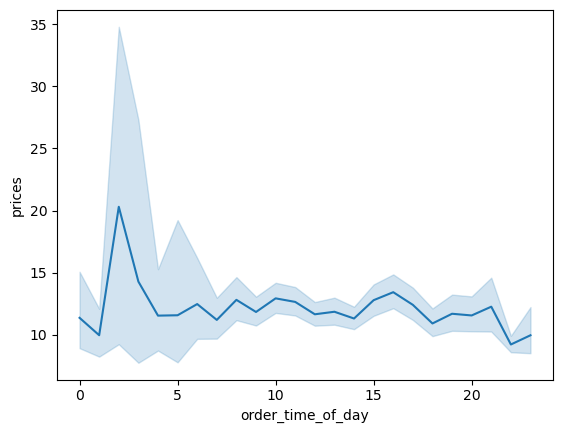

In [40]:
# Line Chart to determine if there's a difference in expenditure between hour of day and prices
line_1 = sns.lineplot(data = df_3, x = 'order_time_of_day',y = 'prices')

Comparing this with the histogram above, we see that there is a difference in the order time and amount spent. The prices are higher during the hours where there is a low number of orders. 

### Step 6: Determine the connection between age and family. 

In [41]:
# create a line chart exploring the connections between age and number of dependants. 
df_4 = small_2[['Age', 'n_dependants']]

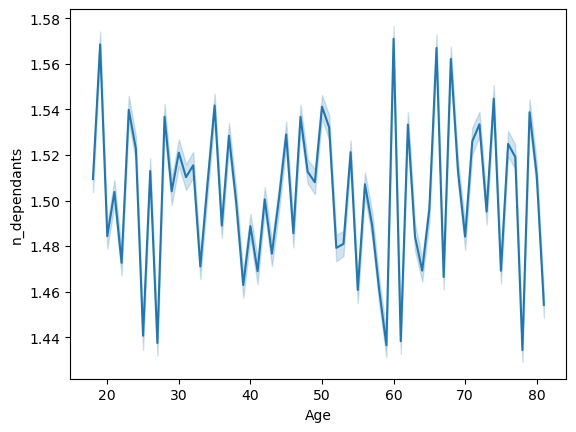

In [42]:
line_2 = sns.lineplot(data = df_4, x = 'Age',y = 'n_dependants')

The line chart shows that there is indeed no relationship between age and number of dependants. 

### Step 7: explore the connection between age and spending power (income) using a scatterplot

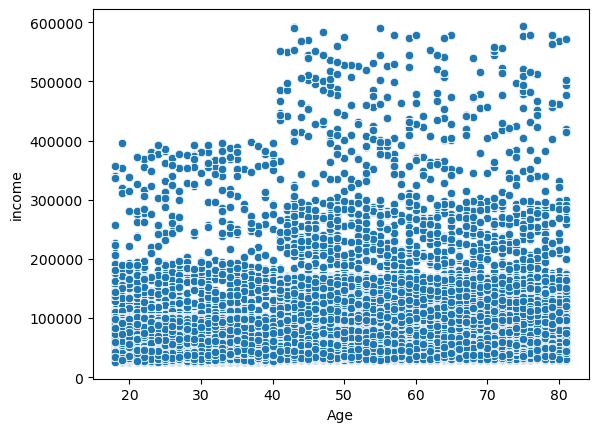

In [44]:
# create a scatterplot to investigate age & income 
sp = sns.scatterplot(x = 'Age', y = 'income',data = df)

There is no relationship between the 2. But it there are higher earners after the age of 40 on average. 

### Step 8: Export visualisations 

In [45]:
#bar chart for days of the week 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [46]:
#bar chart for days of the week 
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_1_orders_dow.png'))

In [47]:
#bar chart for days of the week 
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_2_orders_dow.png'))

In [48]:
# first histogram showing "prices"
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram 1.png'))

In [49]:
# first histogram showing "prices"
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices.density.png'))

In [50]:
# histogram showing "prices"
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices.png'))

In [51]:
# orders day of the week & prices line
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow.prices.png'))

In [52]:
# histogram showing order times and frequency
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order times & frequency.png'))

In [1]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'))

NameError: name 'hist_3' is not defined

In [54]:
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_times.prices.png'))

In [55]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age.dependants.png'))

In [56]:
sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age.income.png'))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32642461 entries, 0 to 32642460
Data columns (total 31 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     float64 
 1   product_name                   object  
 2   aisle_id                       float64 
 3   department_id                  float64 
 4   prices                         float64 
 5   order_id                       float64 
 6   user_id                        float64 
 7   order_number                   float64 
 8   orders_day_of_week             float64 
 9   order_time_of_day              float64 
 10  days_since_prior_order         float16 
 11  add_to_cart_order              float64 
 12  reordered                      float64 
 13  _merge                         category
 14  Busiest days                   object  
 15  Busiest_period_of_day          object  
 16  max_order                      float64 
 17  loyalty_flag             